In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List
dispSize = 10
plt.rcParams['figure.figsize'] = [dispSize*2, dispSize]

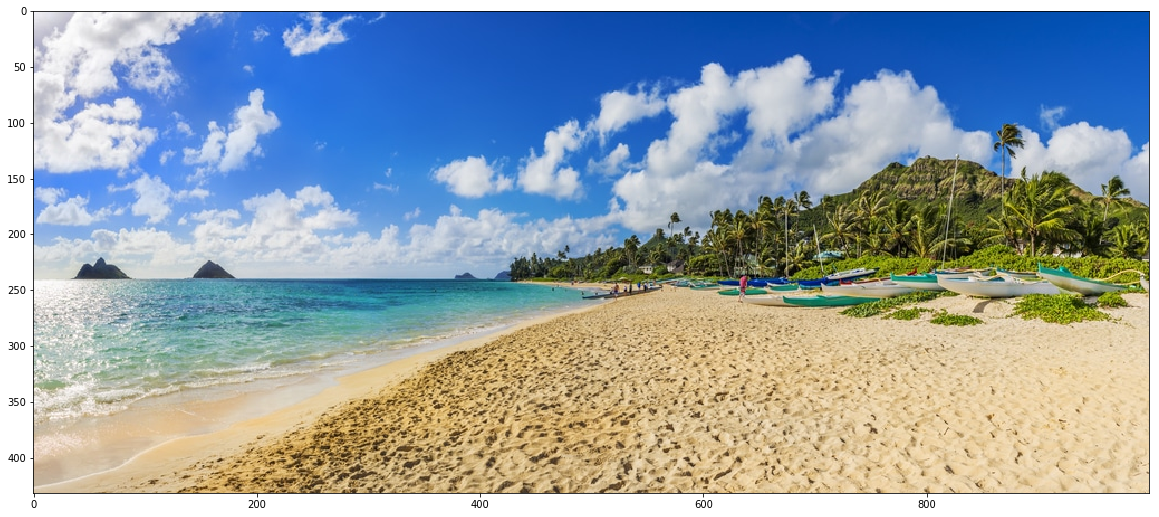

In [99]:
beach = cv2.cvtColor(cv2.imread('beach.jpg'),cv2.COLOR_BGR2RGB)/255
beach_gray = cv2.cvtColor(cv2.imread('beach.jpg'),cv2.COLOR_BGR2GRAY)
plt.imshow(beach)

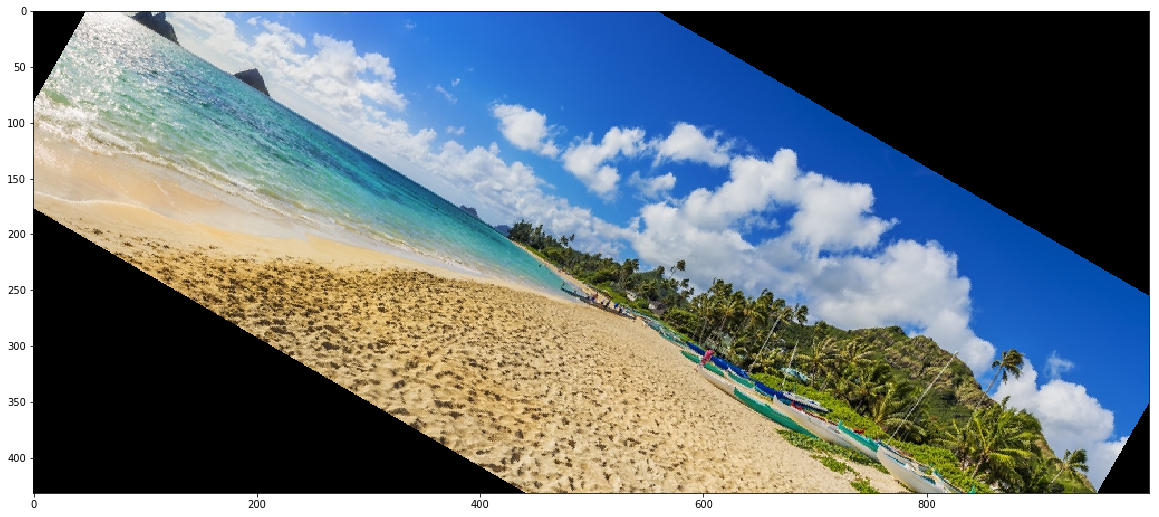

In [93]:
h,w,c = beach.shape
alpha = -30
T = np.array([
    [1,0,w//2],
    [0,1,h//2],
    [0,0,1]
])
M = np.array([
    [np.cos(np.radians(alpha)),-np.sin(np.radians(alpha)),0],
    [np.sin(np.radians(alpha)),np.cos(np.radians(alpha)),0],
    [0,0,1]
])

transM =T.dot(M).dot(np.linalg.inv(T))

X,Y = np.meshgrid(range(w),range(h))
XY1 = np.ones((h,w,c))
XY1[:,:,0] = X
XY1[:,:,1] = Y
XY1 = XY1.reshape((h*w,3))

XY2 = XY1.dot(transM.transpose())
XY2[:,0] += w//2
XY2[:,1] += h//2
beach_padded = np.zeros((h*4,w*4,3))
beach_padded[h//2:3*h//2,w//2:3*w//2,:] = beach
newImage = beach_padded[XY2[:,1].astype(int),XY2[:,0].astype(int),:]
newImage = newImage.reshape((h,w,3))
plt.imshow(newImage)

[[   0.8660254    -0.5         174.98729811]
 [   0.5           0.8660254  -221.06148722]]

[[   0.8660254    -0.5         174.98729811]
 [   0.5           0.8660254  -221.06148722]]


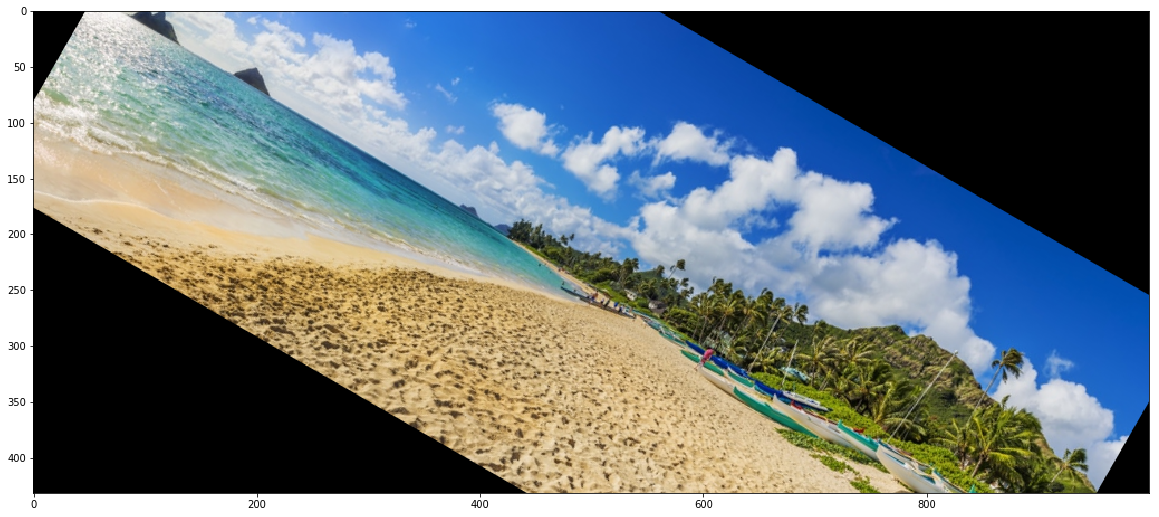

In [58]:
alpha = 30
T = np.array([
    [1,0,w//2],
    [0,1,h//2],
    [0,0,1]
])
R = np.array([
    [np.cos(np.radians(alpha)),-np.sin(np.radians(alpha)),0],
    [np.sin(np.radians(alpha)),np.cos(np.radians(alpha)),0],
    [0,0,1]
])

transM = T.dot(R).dot(np.linalg.inv(T))[:2,:]
opencvM = cv2.getRotationMatrix2D((w/2,h/2),-alpha,1)
print(transM)
print()
print(opencvM)
t_img = cv2.warpAffine(beach,transM,(w,h))
plt.imshow(t_img)